In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mpl_toolkits
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv(r"C:\Users\Toshita Sharma\Desktop\kc_house_data.csv")
data.shape

(21613, 21)

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


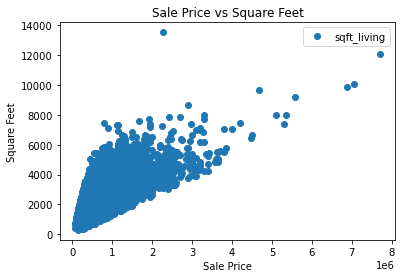

In [7]:
data.plot(x='price', y='sqft_living', style='o')
plt.title('Sale Price vs Square Feet')
plt.xlabel('Sale Price')
plt.ylabel('Square Feet')
plt.show()

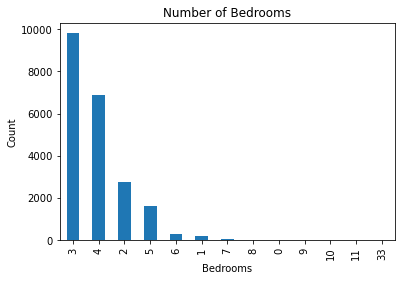

In [8]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title('Number of Bedrooms')
sns.despine
plt.show()

C:\Users\Toshita Sharma\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

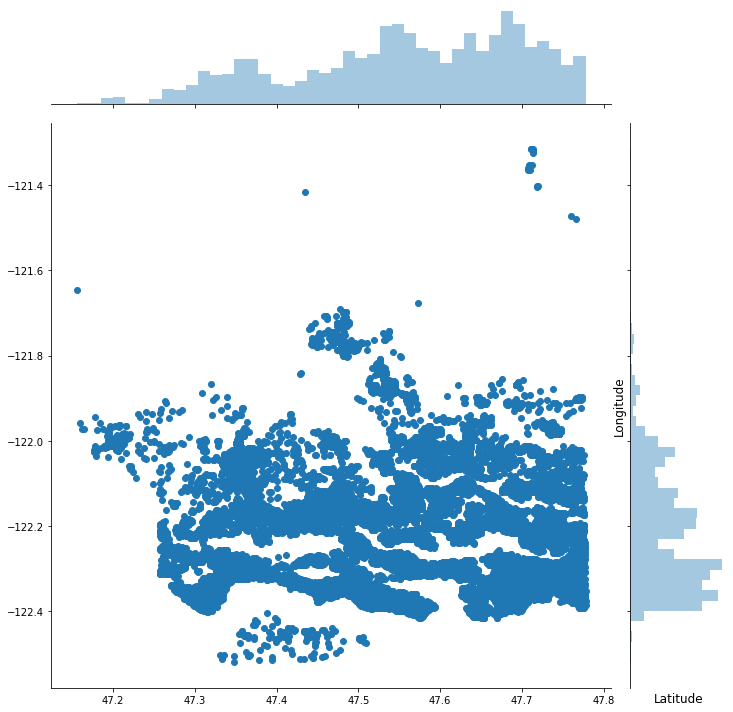

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [9]:
plt.figure(figsize=(10, 10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs Location of the area')

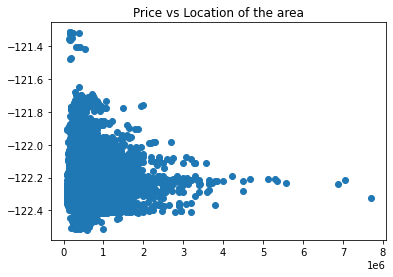

In [10]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

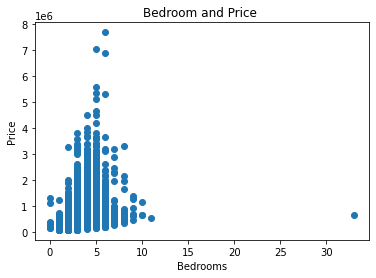

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [11]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine


In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [13]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [18]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

reg.score(x_test,y_test)

0.7320342760357611

In [19]:
original_params={'n_estimators': 400, 'max_depth' : 5, 
                 'min_samples_split' : 2,'learning_rate' : 0.1, 'loss' : 'ls'}
params = dict(original_params)

In [20]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(x_train, y_train)


GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [21]:
clf.score(x_test,y_test)

0.9189380038765613

In [22]:
t_sc = np.zeros((params['n_estimators']),dtype=np.float64)

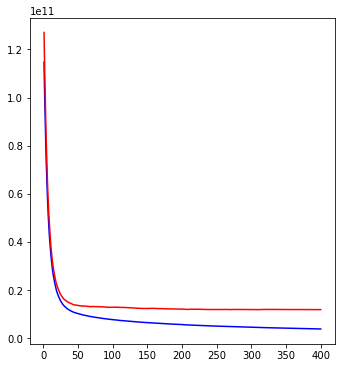

In [23]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i]=clf.loss_(y_test,y_pred)

testsc = np.arange((params['n_estimators']))+1

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')

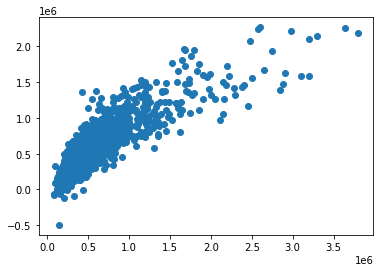

In [24]:
y_pred = reg.predict(x_test)  
plt.scatter(y_test,y_pred)

In [28]:
#model 2

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression 

In [29]:
list = []
for i in range(1,10): 
    regr = RandomForestRegressor(n_estimators = 15, max_depth=i,
                             random_state=1)
    model = regr.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    list.append(model.score(x_test, y_test))
pd.DataFrame(list)

,0
0,0.343284
1,0.554439
2,0.651754
3,0.727962
4,0.777784
5,0.820255
6,0.847587
7,0.863787
8,0.876849


In [30]:
regr = RandomForestRegressor(n_estimators= 20, max_depth=9,
                             random_state=1)
model = regr.fit(x_train, y_train)
y_pred_ranf = model.predict(x_test)
score_ranf = model.score(x_test, y_test)
print('MSE:', mean_squared_error(y_pred_ranf, y_test))
mse_ranf = mean_squared_error(y_pred_ranf, y_test)
print('R2:', score_ranf)

MSE: 17985229959.56962
R2: 0.8769191758910401


In [31]:
regr.score(x_test,y_test)

0.8769191758910401